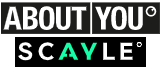

In [1]:
# Load image from local storage
# This library is to create displays
from IPython.display import Image

Image(filename="logo.png", width=200, height=75)

## About You / Scayle Home Assignment

Bout you and scayle kısaca kimdir?

TV Attribution Case: problem ne neden buna ihtiyaç var açıklmasını ekle bu kısımdaki ilk amacın tv attributiondan bağımsız olarak elimizdeki veriyi anlamak olduğunu yazalım. 




In [10]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime

# calling functions from the manual created util file
from util import (
    df_first_look,
    file_read,
    sessions_final_df_cleaning,
    countplot_viz,
)

from datetime import datetime
from datetime import timedelta

# adding options to visualise all rows and columns in the project
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

# ignoring warnings
warnings.filterwarnings("ignore")

# adding useful magic functions
%load_ext lab_black
%matplotlib inline
%config Completer.use_jedi = False

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


### Dataset
The data is contained five datesets in two files:

* case_may_2020_sessions_final.csv - Containing identifier, origin, channel and datetime values about each visits.(15th of May)
* case_may_2020_TV_data.xlsx - Containing four sheets as;
    * Audience : Containing spot audience reaching counts for each TV shows.
    * TV planning : Containing spots block details for May 2020.
    * TV spots : Containing spot details. 
    * TV visits match : Containing the estimated TV probabilities per session. 


In [2]:
# Reading all files into the data frames
(
    sessions_final_df,
    audience_df,
    tv_planning_df,
    tv_spots_df,
    tv_visits_match_df,
) = file_read()

## Data Set Overview and Sanity Check
### sessions_final_df: 

In [3]:
df_first_look(sessions_final_df)

First 5 rows of dataframe:
--------------------------
    Unnamed: 0 origin     channel                  identifier date_hour_minute
0           0    app  Direct App  13dd4f3336931ae1e9ad25cdd8   15.05.20 00:00
1           1    app  Direct App  5cf5cc657df461e9d106759592   15.05.20 00:00
2           2    app  Direct App  724351e367f9a4fa8822097365   15.05.20 00:00
3           3    app  Direct App  448ea34d7541666d15a161bf41   15.05.20 00:00
4           4    app  Direct App  b5018d66073c716da53b0afea1   15.05.20 00:00

Last 5 rows of dataframe:
--------------------------
          Unnamed: 0 origin                   channel                        identifier date_hour_minute
1058458     1058447    web                       PSM                940860951026110001   15.05.20 23:59
1058459     1058452    web  Organic Search Non Brand               9229465260410100005   15.05.20 23:59
1058460     1058453    web  Organic Search Non Brand               1840437928708700001   15.05.20 23:59
105846

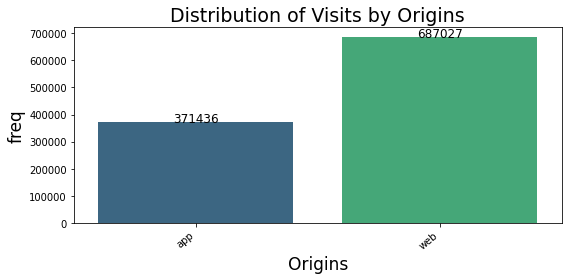

In [4]:
# Visit count by origins:
countplot_viz(
    sessions_final_df,
    "origin",
    "Origins",
    "freq",
    "Distribution of Visits by Origins",
    figsize_x=8,
    figsize_y=4,
    palette="viridis",
)

* There are 2 different origins of visits. Visit count from web more than visit count from app. 

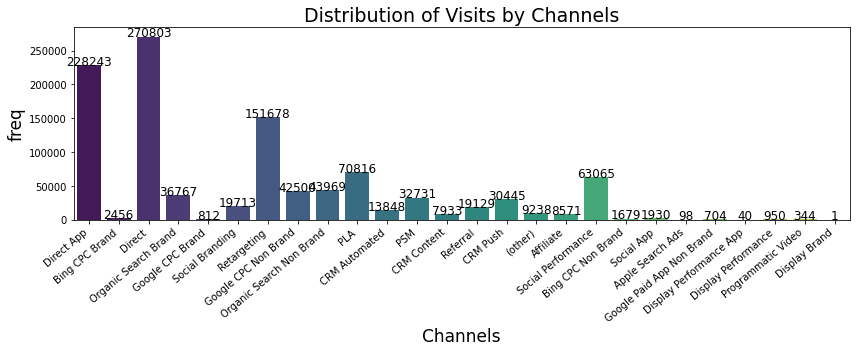

In [5]:
# Visit count by channels:
countplot_viz(
    sessions_final_df,
    "channel",
    "Channels",
    "freq",
    "Distribution of Visits by Channels",
    palette="viridis",
)

* There are 26 different channels of visits. Visit count from Direct and Direct App more than others. For The TV Attribution Case, we'll include a certain list of channels: Search engines (SEO + SEA, Brand) and Direct Type-in Traffic.

In [6]:
# To check datatypes of date_hour_minute:
print(sessions_final_df["date_hour_minute"].dtypes)

object


In [16]:
# counting identifiers by date column
visit_count_minute_df = (
    sessions_final_df.groupby(by=["date_hour_minute"])["identifier"]
    .count()
    .reset_index()
)

In [18]:
# changing the format of the date column
visit_count_minute_df["date_hour_minute"] = pd.to_datetime(
    visit_count_minute_df["date_hour_minute"]
)

In [20]:
# adding hour column to be used in the furhter analysis
visit_count_minute_df["date_hour"] = visit_count_minute_df["date_hour_minute"].dt.hour

### Analysing Hourly Visit Distributions

<AxesSubplot:>

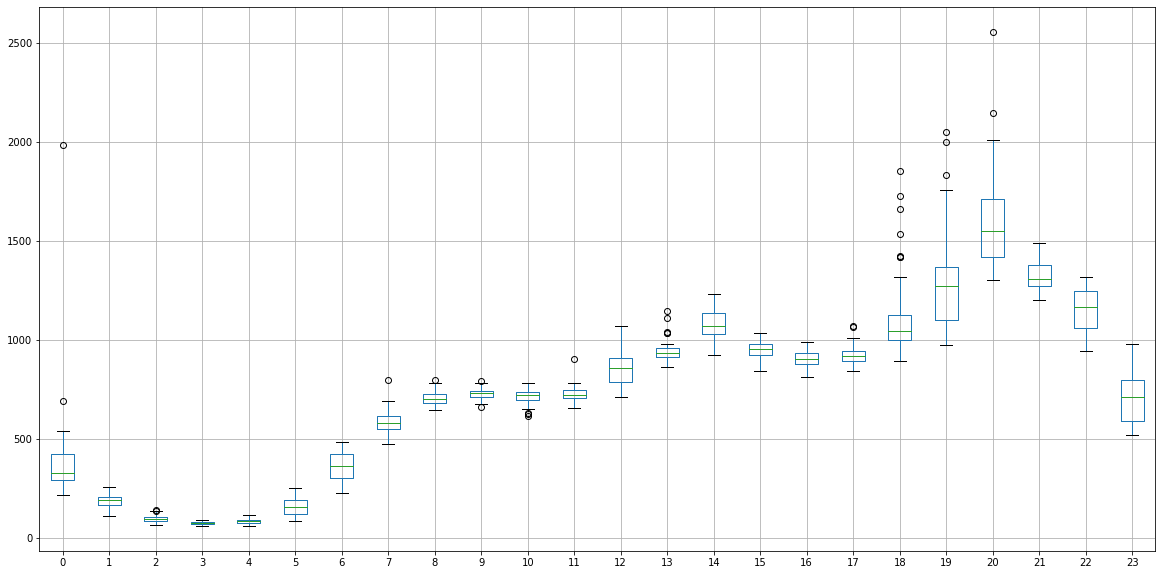

In [24]:
visit_count_minute_df.pivot(columns="date_hour", values="identifier").boxplot(
    figsize=(20, 10)
)

#### Findings

Regarding the time series box plot we can easily detect that each hour has different behaviours. Here are some key findings;

* We don't any night owls: Between 1 and 4 am our visits are in the minimum levels. It is a sign that we shouldn't invest into these time frames for this country.
* Before work: Between 5 and 7 am it looks like our users start scratching the surface and check our products. This is a good opportunity to engage some early birds with personalised offers.
* Do not disturb: Between 8 and 11 am & 3 and 5 pm our users are at work or quite busy that their behaviours are pretty stable and identical. Making an investment in these hours in this country may not have a huge influence on our visits.
* Having lunch and searching some gems: Between 12 am and 2 pm our users are having lunch, enjoying and resting but also reaching out to our products. This is a great opportunity to send reminders to these users before 12 am, e.g. 11:45, to nudge them.
* Here comes the buyers: Our users are out of office or dinner with their friends and families (since it is Corona time, probably online ones!) then starting checking our products. As we see highly skewed distributions and many outliers between 6 and 8 pm we can easily say that there are some external factors that changes the behaviours of our users! Who knows maybe TV advertisements!
* Closing the applications: Between 9 and 12 pm our users are shutting down their laptops and mobile devices. As we can see the visits are dropping and distributions are getting closer to normal distribution. At these hours people tend not to make big decisions so probably they are adding poroducts to their carts. An early reminder to these users in the next day to nudge them to proceed to the full funnel is a great oportunity without any marketing cost.

### audience_df:

In [7]:
df_first_look(audience_df)

First 5 rows of dataframe:
--------------------------
                                tv_show     reach
0     First Dates - Ein Tisch für zwei   57000.0
1                       SOKO Kitzbühel   95000.0
2                      Alles was zählt   86000.0
3                         Jack Reacher  162000.0
4  Der Bulle von Tölz: Tod aus dem All  150000.0

Last 5 rows of dataframe:
--------------------------
                             tv_show     reach
15        Genial daneben - das Quiz  120000.0
16  Grenzenlos - Die Welt entdecken  140000.0
17                        Unter uns  130000.0
18              Das perfekte Dinner  600000.0
19                  Atlanta Medical  320000.0

Row count of dataframe:
-----------------------
 20 
Column count of dataframe:
--------------------------
 2

List of columns in the dataframe:
---------------------------------
 ['tv_show' 'reach']

Looking NaN values and datatypes of columns in the dataframe:
--------------------------------------------

<class 'pa

<AxesSubplot:xlabel='tv_show'>

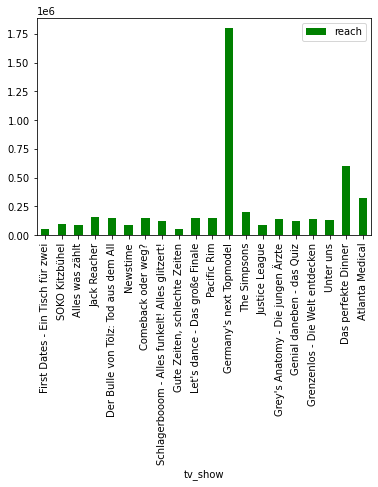

In [15]:
audience_df.plot.bar(x="tv_show", y="reach", color="")